In [1]:
import pandas as pd #library to deal with data

import matplotlib.pyplot as plt #for plots
import seaborn as sns

from sklearn.model_selection import train_test_split #split data to train and test data

from sklearn.linear_model import LogisticRegression # model that predicts for binary classification(0/1 outcome)
from sklearn.svm import SVC # support vector classification model(used for multidimensionnel plan),uses hyperplane for splitting classes
from sklearn.ensemble import RandomForestClassifier  #model that uses binary tree for classification
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix # table that has a summary for the performance of the model
from sklearn.metrics import accuracy_score , recall_score , f1_score #the metrics used to see if your model predicts well or no


plt.style.use('fivethirtyeight') #style pf plot


In [2]:
data=pd.read_csv('C:/Users/medkh/OneDrive/Desktop/ias_workshops/archive/diabetes.csv') # read data from csv file

# explore data

In [3]:
data.head() #show first 5 lines

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info() #to see the type of our values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe() # to see the min,the max...of our values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.duplicated().sum() #see if we have dupllicated data

0

# data analysis

In [4]:
data.corr() #explore the relation between columns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

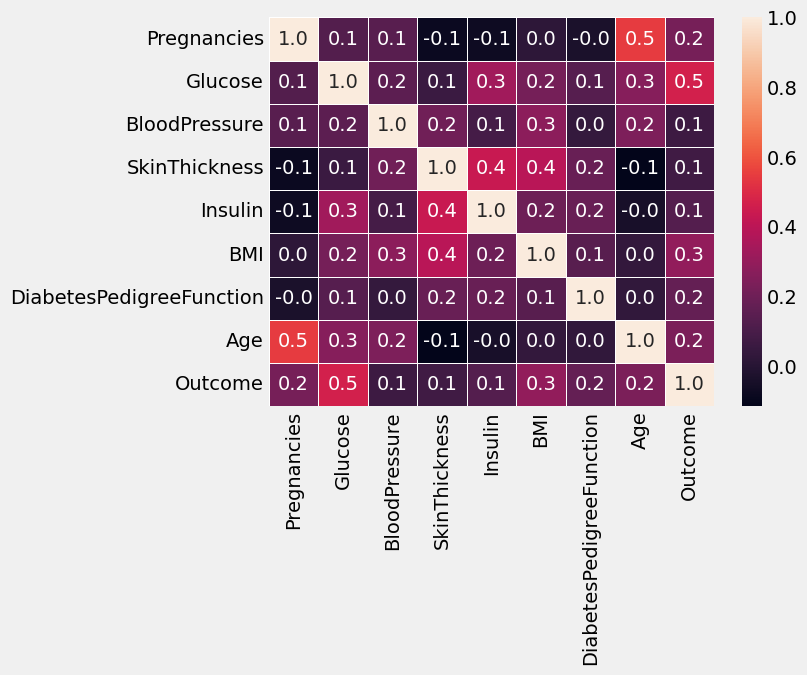

In [9]:
sns.heatmap(data.corr(),annot=True,fmt='0.1f',linewidth=.5) #use heatmap to understand more the correlation

C:\Users\medkh\AppData\Local\Temp\ipykernel_31868\2990758130.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome',data=data,palette=['g','r'])


<Axes: xlabel='Outcome', ylabel='count'>

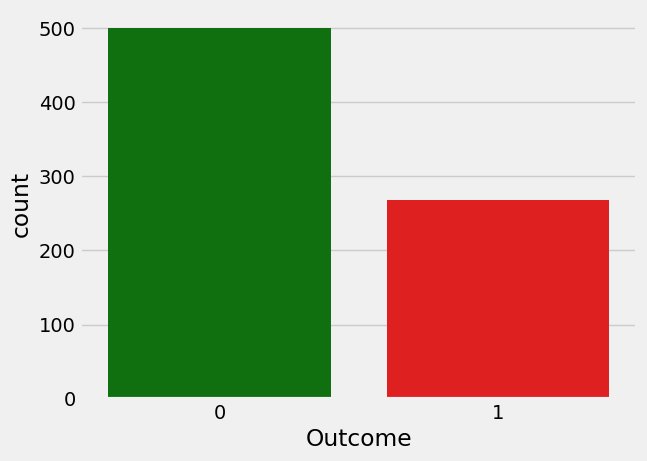

In [8]:
sns.countplot(x='Outcome',data=data,palette=['g','r']) #see the number of 0 outcomes and 1 outcomes(our data is unbalanced!!!!)

C:\Users\medkh\AppData\Local\Temp\ipykernel_41324\659351890.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Pregnancies"])


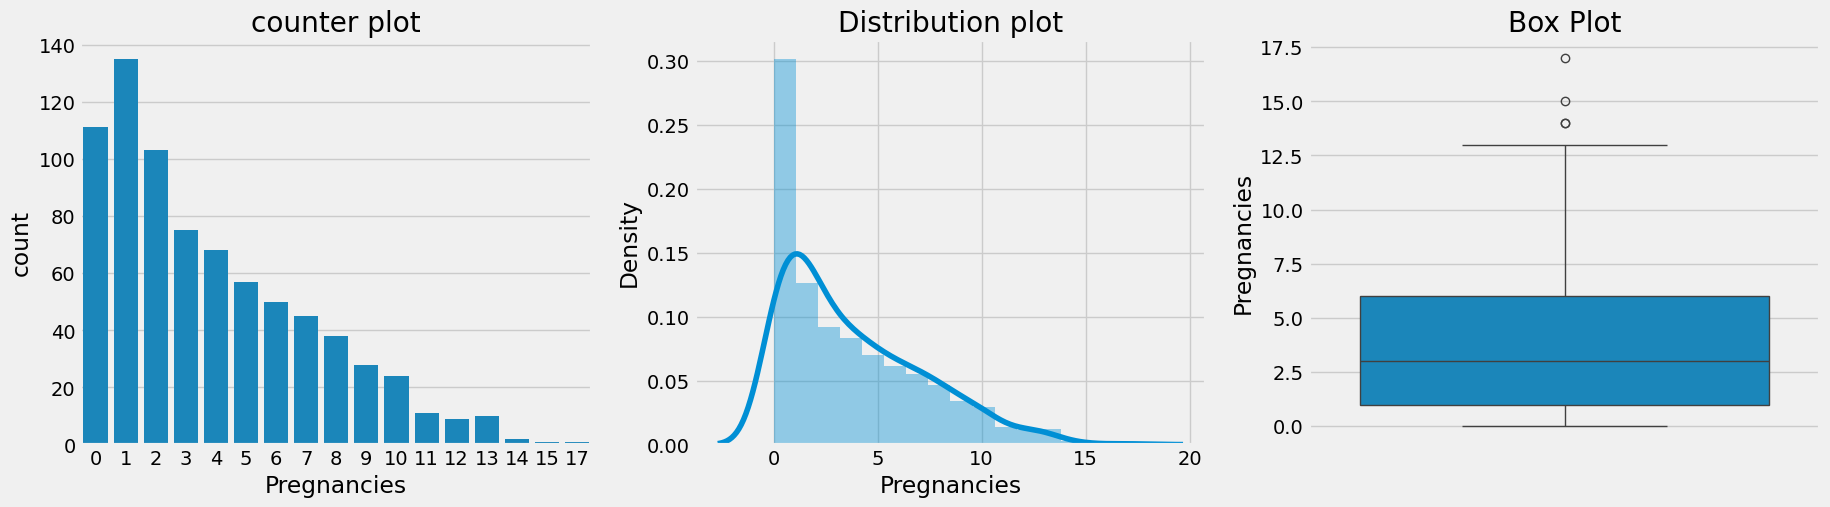

In [5]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(x='Pregnancies',data=data)
plt.title('counter plot')

plt.subplot(1,3,2)
plt.title('Distribution plot')
sns.distplot(data["Pregnancies"])

plt.subplot(1,3,3)
plt.title('Box Plot')
sns.boxplot(y=data["Pregnancies"])
plt.show()   # make three figures of the pregnancies,count in each month,the density and the box

# create model

In [6]:
x=data.drop('Outcome',axis=1) #axis=1 means i'm dropping a column #make the data unlabeled(remove the outcome from x)
y=data['Outcome'] #choose the outcome as our goal to predict

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2) #split the data to train and test

In [8]:
model1=LogisticRegression()
model2=SVC()
model3=RandomForestClassifier() 
model4=GradientBoostingClassifier(n_estimators=1000) # put the models in variables 

In [9]:
columns=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]

LogisticRegression()
accuracy is :  0.7922077922077922 recall is : 0.7804878048780488 f1 : 0.6666666666666666


C:\Users\medkh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


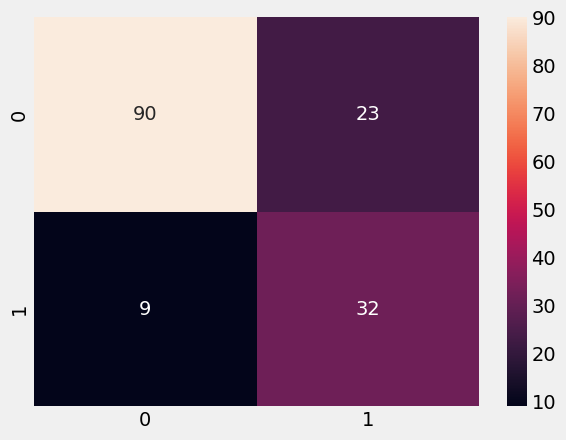

In [10]:
def call(model):
    model.fit(x_train,y_train) #fit our model to the data
    pre=model.predict(x_test) #make the prediction
    accuracy=accuracy_score(pre,y_test) #prepare the accuracy metric
    recall=recall_score(pre,y_test) #prepare the recall metric
    f1=f1_score(pre,y_test) #prepare the recall metric
    result1.append(accuracy) #add the result to a list
    result2.append(recall) #add the result to a list
    result3.append(f1) #add the result to a list
    sns.heatmap(confusion_matrix(pre,y_test),annot=True) #visualize our result in a heatmap
    print(model)
    print('accuracy is : ',accuracy,'recall is :',recall,'f1 :', f1) # show the metrics values
call(model1) #apply the function logisticregression model

SVC()
accuracy is :  0.7857142857142857 recall is : 0.8235294117647058 f1 : 0.6292134831460674


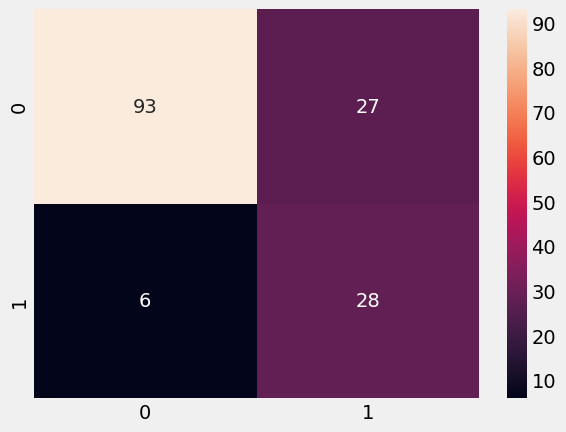

In [11]:
call(model2) 

RandomForestClassifier()
accuracy is :  0.7987012987012987 recall is : 0.7727272727272727 f1 : 0.6868686868686869


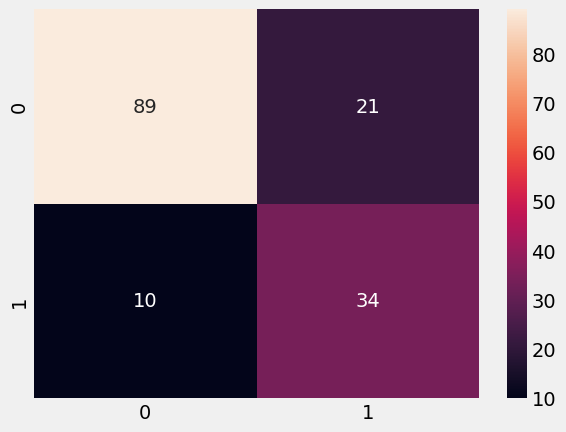

In [12]:
call(model3)

GradientBoostingClassifier(n_estimators=1000)
accuracy is :  0.7597402597402597 recall is : 0.68 f1 : 0.6476190476190476


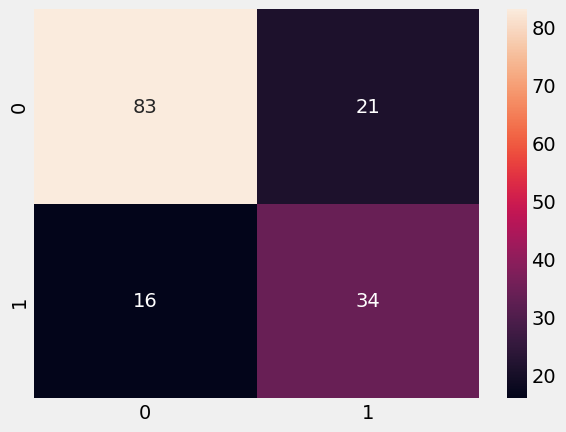

In [13]:
call(model4)

In [14]:
result1

[0.7922077922077922,
 0.7857142857142857,
 0.7987012987012987,
 0.7597402597402597]

In [15]:
result2

[0.7804878048780488, 0.8235294117647058, 0.7727272727272727, 0.68]

In [16]:
result3

[0.6666666666666666,
 0.6292134831460674,
 0.6868686868686869,
 0.6476190476190476]

In [48]:
finalResult=pd.DataFrame({'algorithms':columns,'acuuracies':result1,'recall':result2,'f1':result3})

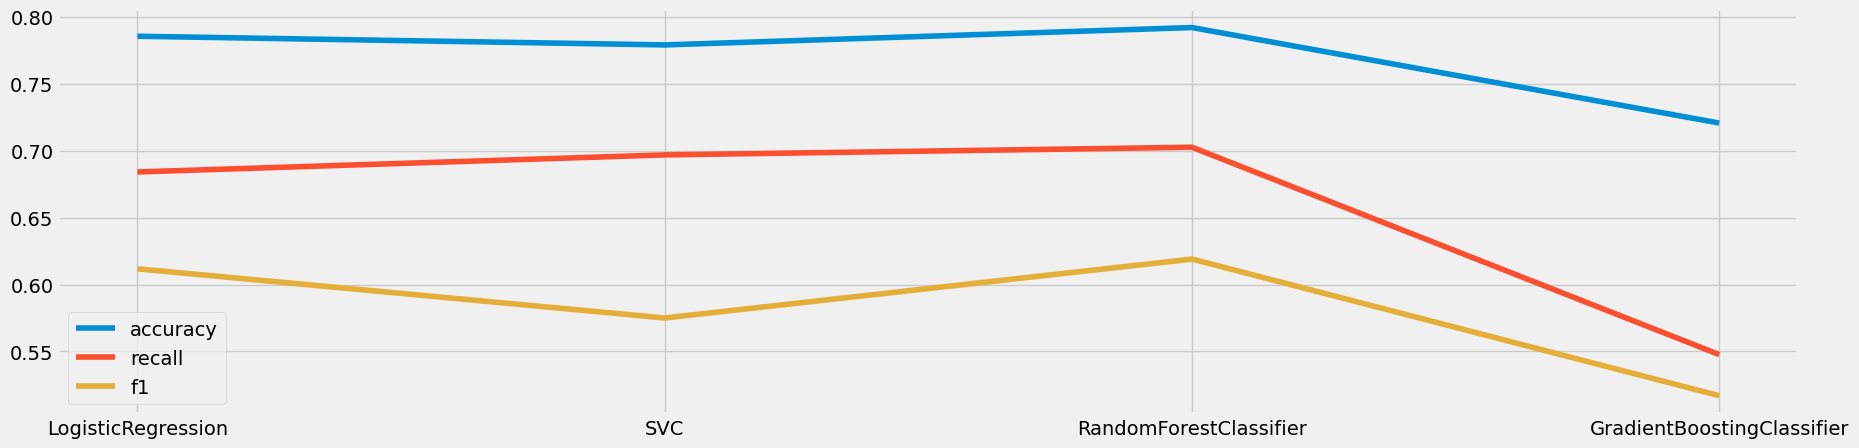

In [53]:
fig=plt.subplots(figsize=(20,5))
plt.plot(finalResult.algorithms,result1,label='accuracy')
plt.plot(finalResult.algorithms,result2,label='recall')
plt.plot(finalResult.algorithms,result3,label='f1')
plt.legend()
#compare the models


In [20]:
import ipywidgets as widgets
from IPython.display import display

In [27]:
data.tail(7) #see last 7 lines in  data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Output()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [17]:
model_names = ['Logistic Regression', 'Random Forest', 'SVC']
trained_models = [model1, model2, model3]

def get_user_input():
    Pregnancies = int(input("Enter number of Pregnancies: "))
    Glucose = float(input("Enter Glucose level: "))
    BloodPressure = float(input("Enter Blood Pressure: "))
    SkinThickness = float(input("Enter Skin Thickness: "))
    Insulin = float(input("Enter Insulin level: "))
    BMI = float(input("Enter BMI: "))
    DiabetesPedigreeFunction = float(input("Enter Diabetes Pedigree Function: "))
    Age = int(input("Enter Age: "))
    
    return [[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]]

# Prediction
data_point = get_user_input()
predictions = {name: model.predict(data_point)[0] for model, name in zip(trained_models, model_names)}

# Display predictions
for model_name, prediction in predictions.items():
    status="diabetic" if prediction == 1 else "not diabetic"
    print(f"{model_name} Prediction:  {status}")   #use this function to  put values and test the performance of the models

Enter number of Pregnancies:  9
Enter Glucose level:  170
Enter Blood Pressure:  74
Enter Skin Thickness:  31
Enter Insulin level:  0
Enter BMI:  44
Enter Diabetes Pedigree Function:  0.4
Enter Age:  43


Logistic Regression Prediction:  diabetic
Random Forest Prediction:  diabetic
SVC Prediction:  diabetic


C:\Users\medkh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\medkh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\medkh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#in this last result i chose the line 761 from the data and i picked the values where the outcome =1,means the patient is diabetic,and our 3 models told us that the patient is diabetic,so our code is running well